In [2]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?


In [3]:
df_flight = pd.read_excel("flight_price.xlsx")

In [4]:
df_flight.shape

(10683, 11)

## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.


In [5]:
df_flight.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_flight['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

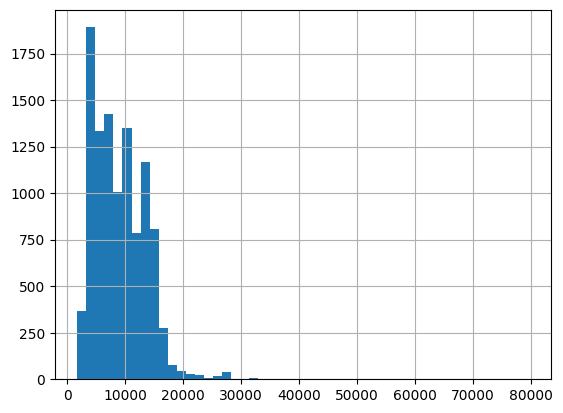

In [7]:
df_flight['Price'].hist(bins = 50)
plt.show()

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [8]:
print("Maximum Flight Price:", df_flight['Price'].max(), "& Minimum Flight Price:", df_flight['Price'].min())

Maximum Flight Price: 79512 & Minimum Flight Price: 1759


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.



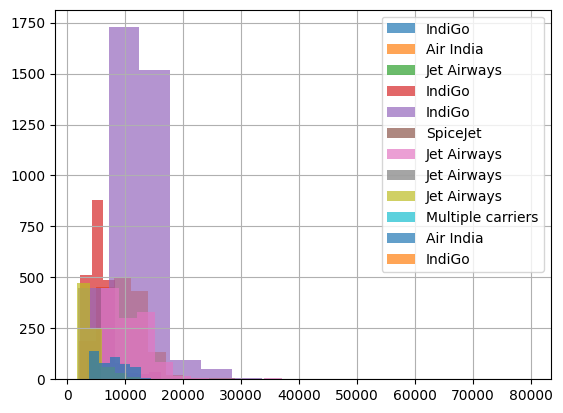

In [9]:
df_flight.groupby('Airline')['Price'].hist(alpha=0.7)
plt.legend(df_flight['Airline'])
plt.show()

C:\Users\E5562485\AppData\Local\Temp\ipykernel_70376\2617715337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_flight['Airline'],y=df_flight['Price'],palette='hls')


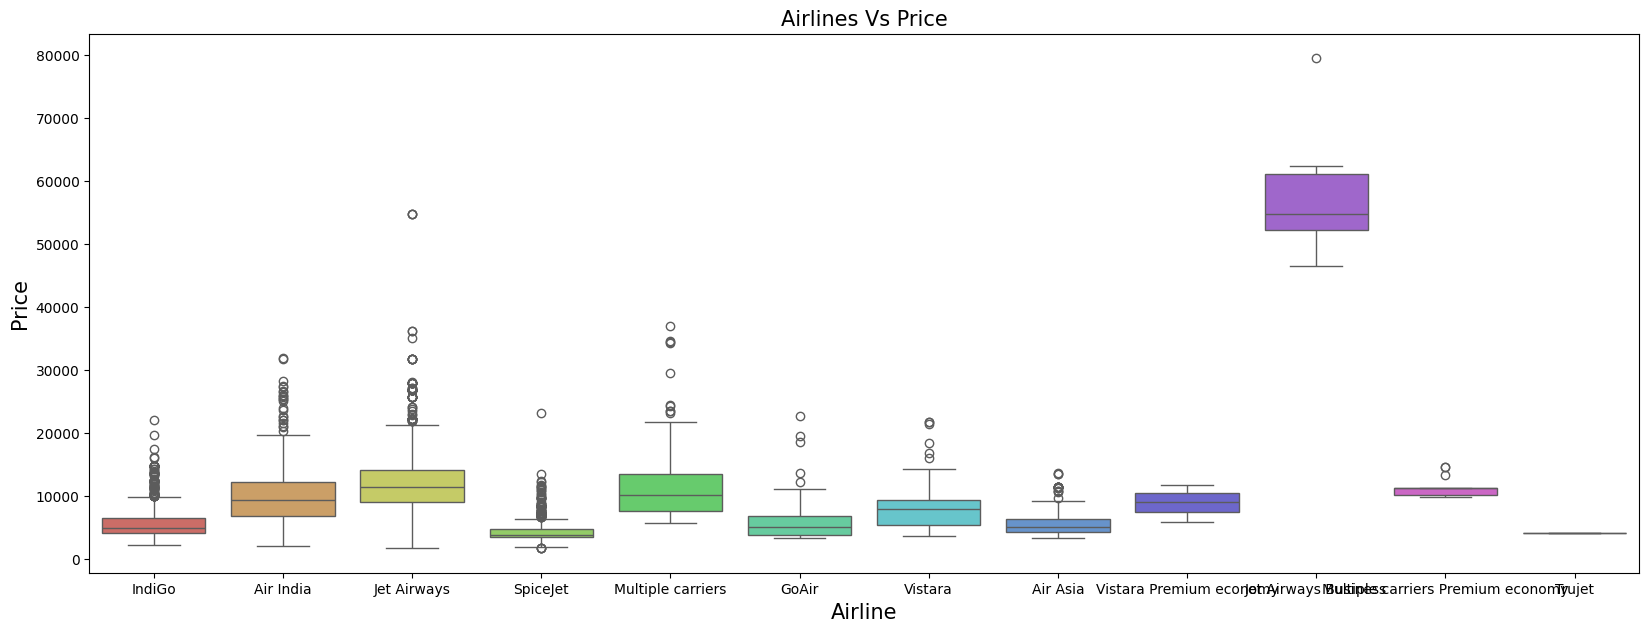

In [10]:
plt.figure(figsize=(20,7))
sns.boxplot(x=df_flight['Airline'],y=df_flight['Price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.


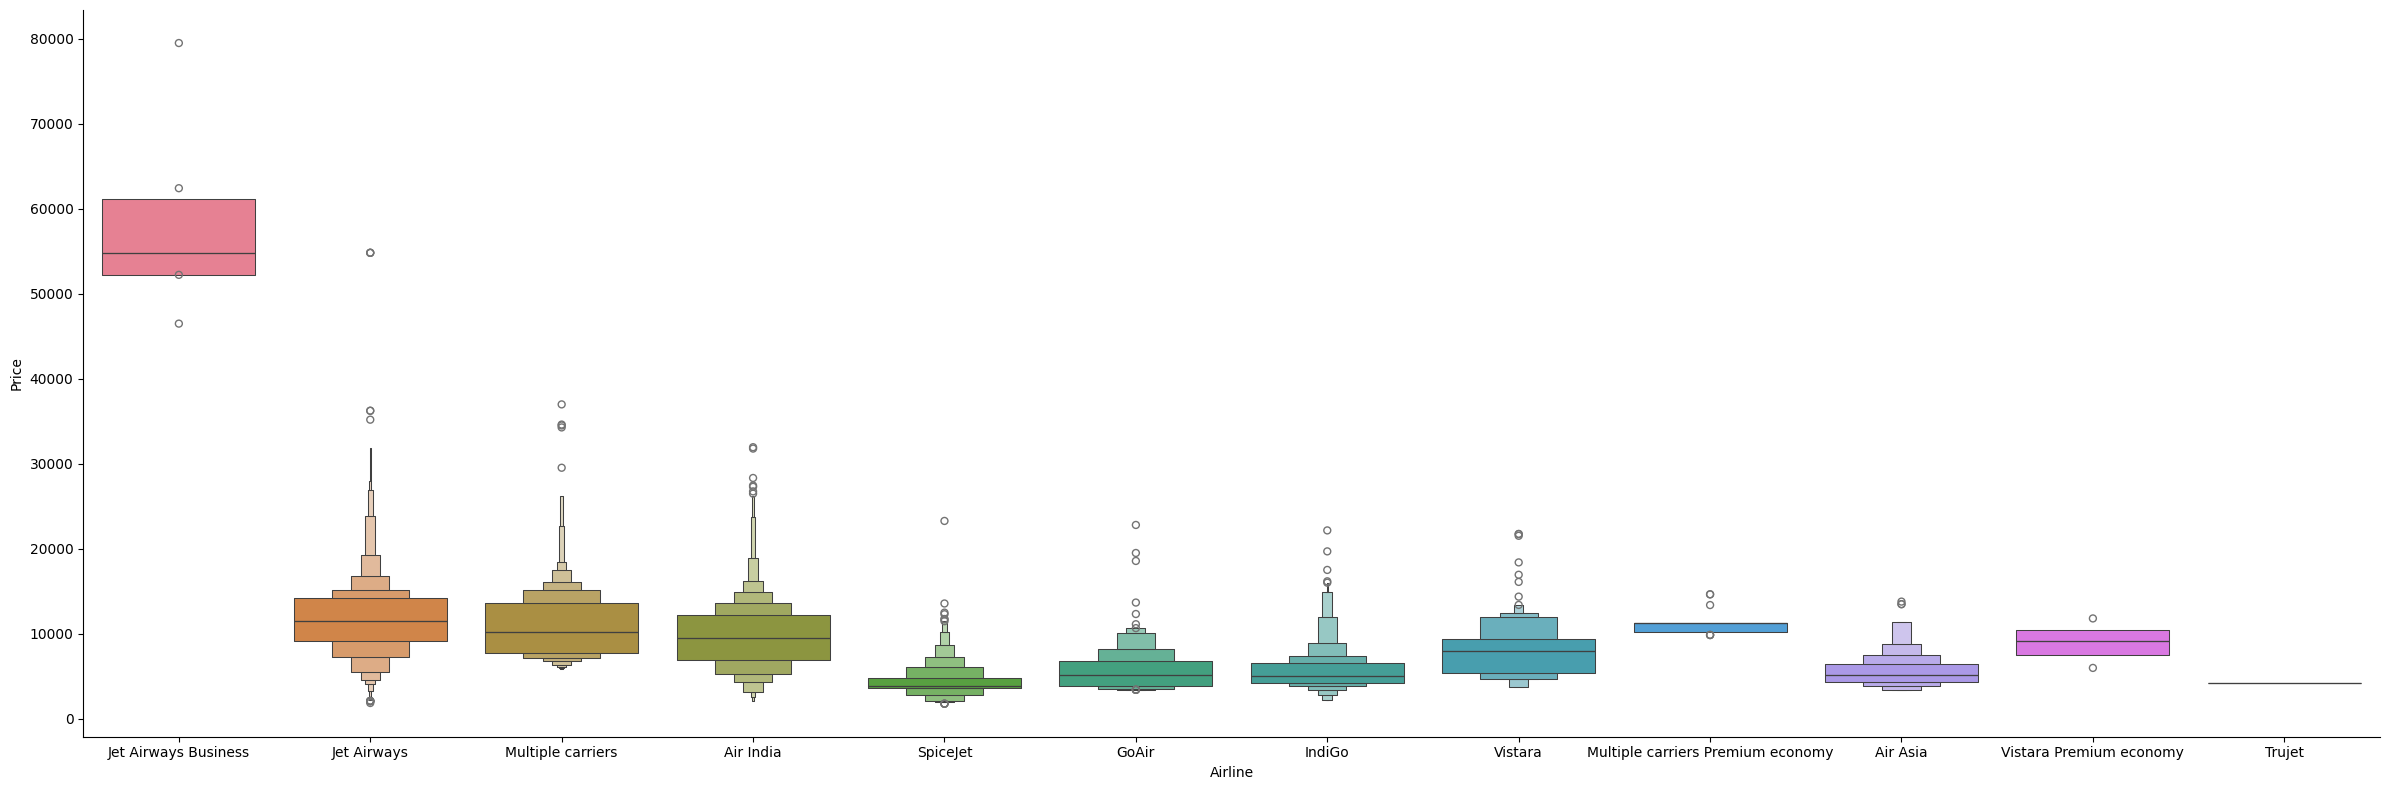

In [11]:
sns.catplot(y = "Price", x = "Airline", data = df_flight.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3, hue="Airline")
plt.show()

Jetairways has the maximum outliers in terms of flight prices.

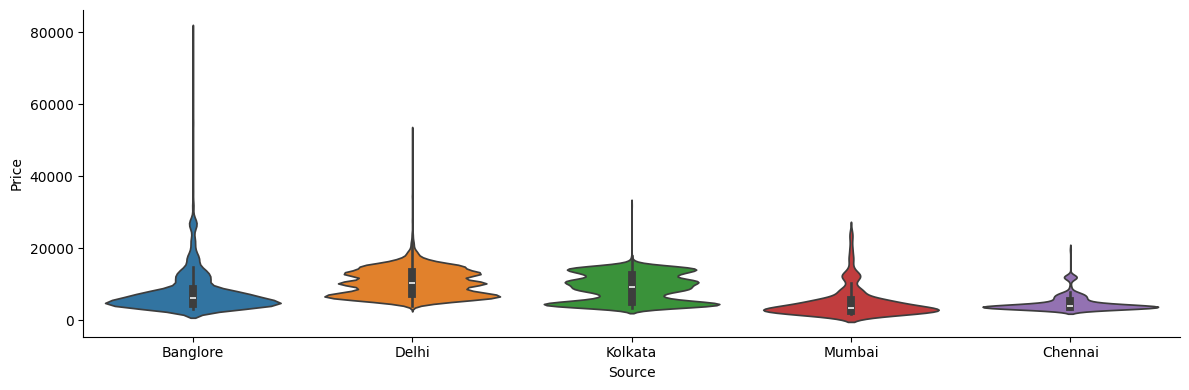

In [12]:
sns.catplot(y = "Price", x = "Source", data = df_flight.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3, hue="Source")
plt.show()

by looking at the above violin plot, we can say the as a source of the flight, Bangalore has the most number of the outliers in price and the chennai has the least.

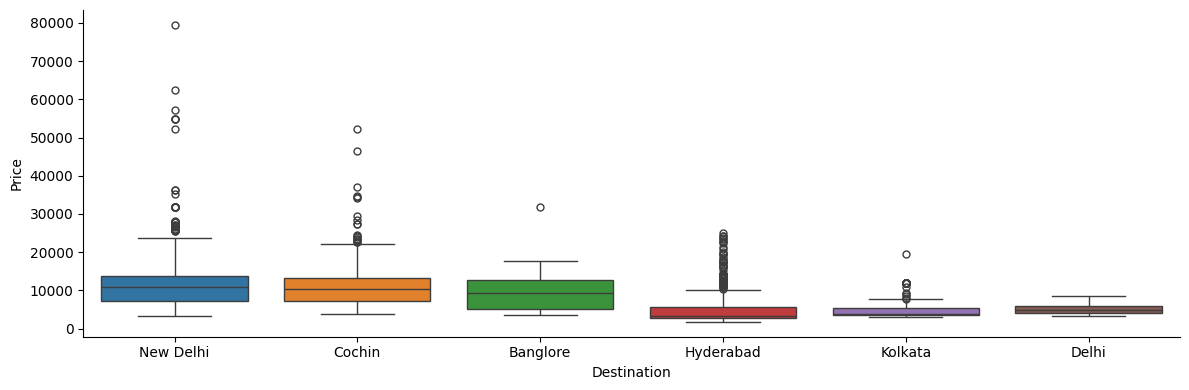

In [13]:
sns.catplot(y = "Price", x = "Destination", data = df_flight.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3, hue="Destination")
plt.show()

From the above boxplot, we can say that as a flight destination the New Delhi has the most number of outliers in terms of the flight price and the kolkata has the least. 

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [14]:
df_flight.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Diving the "Date_of_Journey" features into three different subparts (journey_day, journey_month, journey_year) of better data analysis and dropping the "Date_of_Journey" feature afterwards.**

In [15]:
df_flight['journey_day']=df_flight["Date_of_Journey"].str.split("/").str[0].astype(int)
df_flight['journey_month']=df_flight["Date_of_Journey"].str.split("/").str[1].astype(int)
df_flight['journey_year']=df_flight["Date_of_Journey"].str.split("/").str[2].astype(int)

In [16]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [17]:
df_flight.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [18]:
df_flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
df_flight["journey_month"].unique()

array([3, 5, 6, 4])

In [20]:
df_flight['journey_month'].value_counts()

journey_month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

From the above, we can say the 5th month of the year is the peak season where most number of flights booked.

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

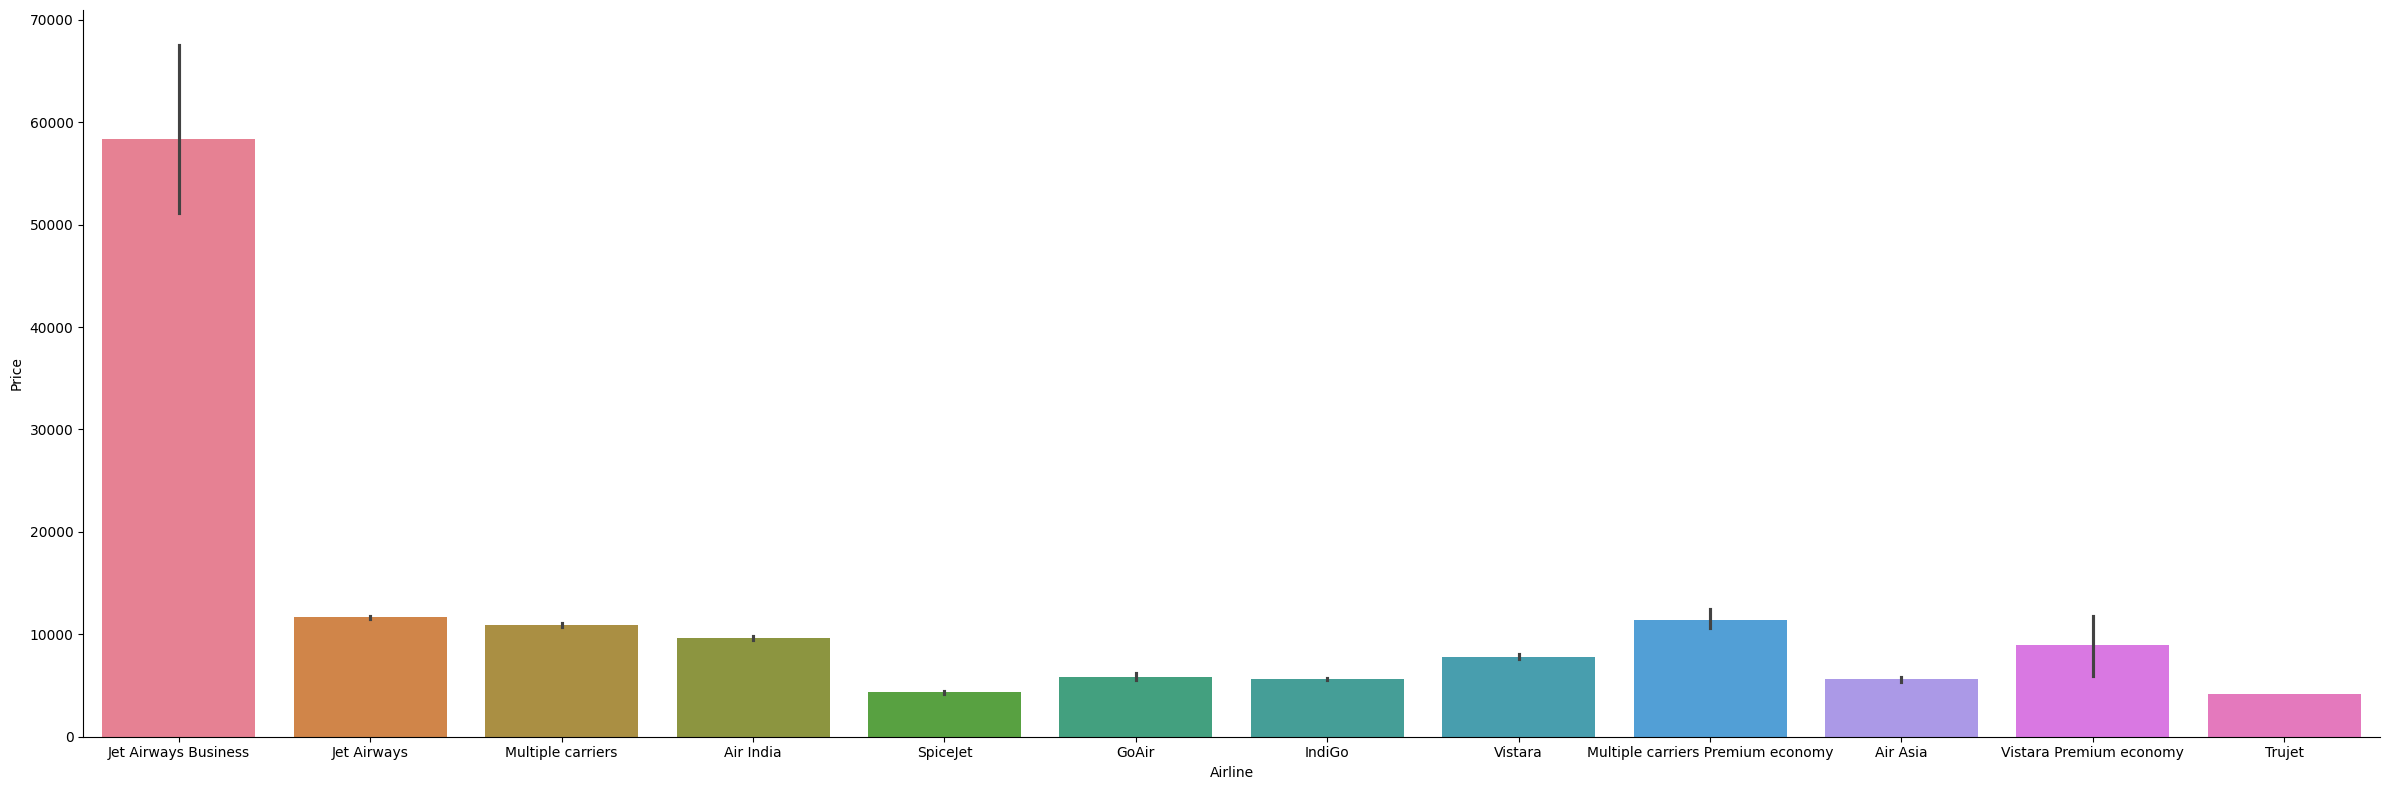

In [21]:
sns.catplot(y = "Price", x = "Airline", data = df_flight.sort_values("Price", ascending = False), kind="bar", height = 8, aspect = 3, hue="Airline")
plt.show()

**By the above graph, we can observe that jet airways business has the highest flight prices among all the flights.**

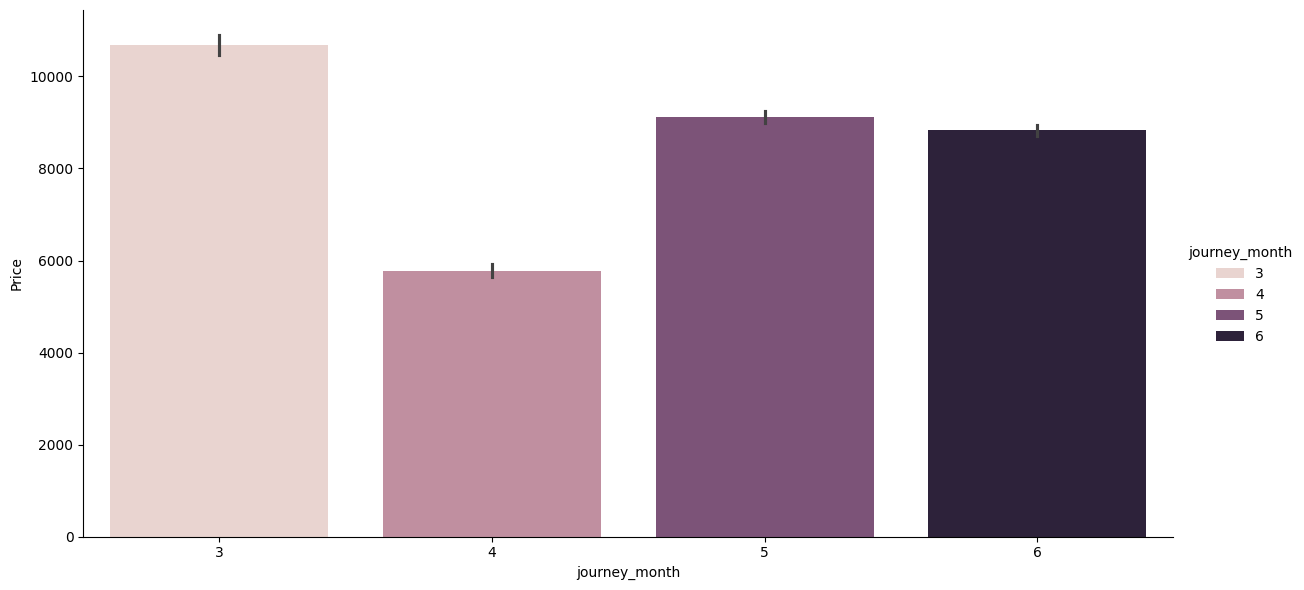

In [22]:
sns.catplot(y = "Price", x = "journey_month", data = df_flight.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 2, hue="journey_month")
plt.show()

**By observing the above graph, we can come to a conclusion that in the month of March within whole year, the flight prices are highest.**

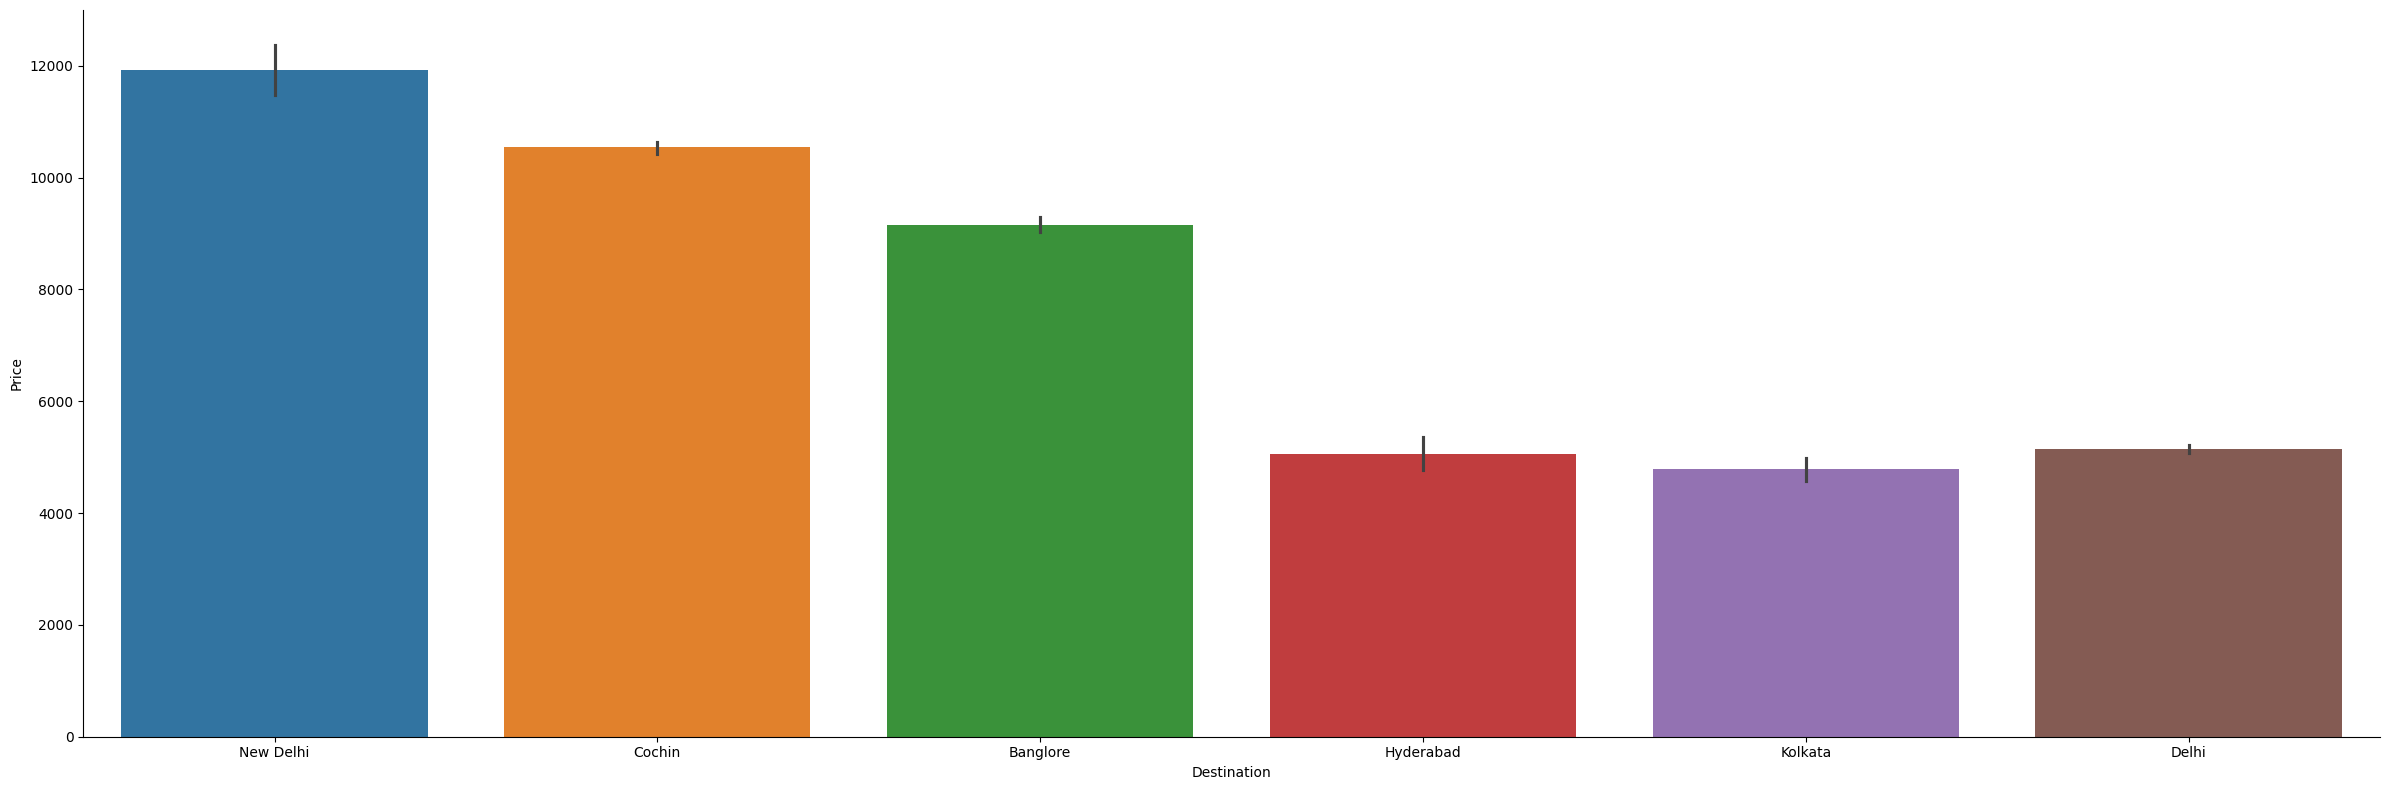

In [23]:
sns.catplot(y = "Price", x = "Destination", data = df_flight.sort_values("Price", ascending = False), kind="bar", height = 8, aspect = 3, hue="Destination")
plt.show()

**By looking at the above graph, we can say that flights which have destination as delhi has the highest prices.**

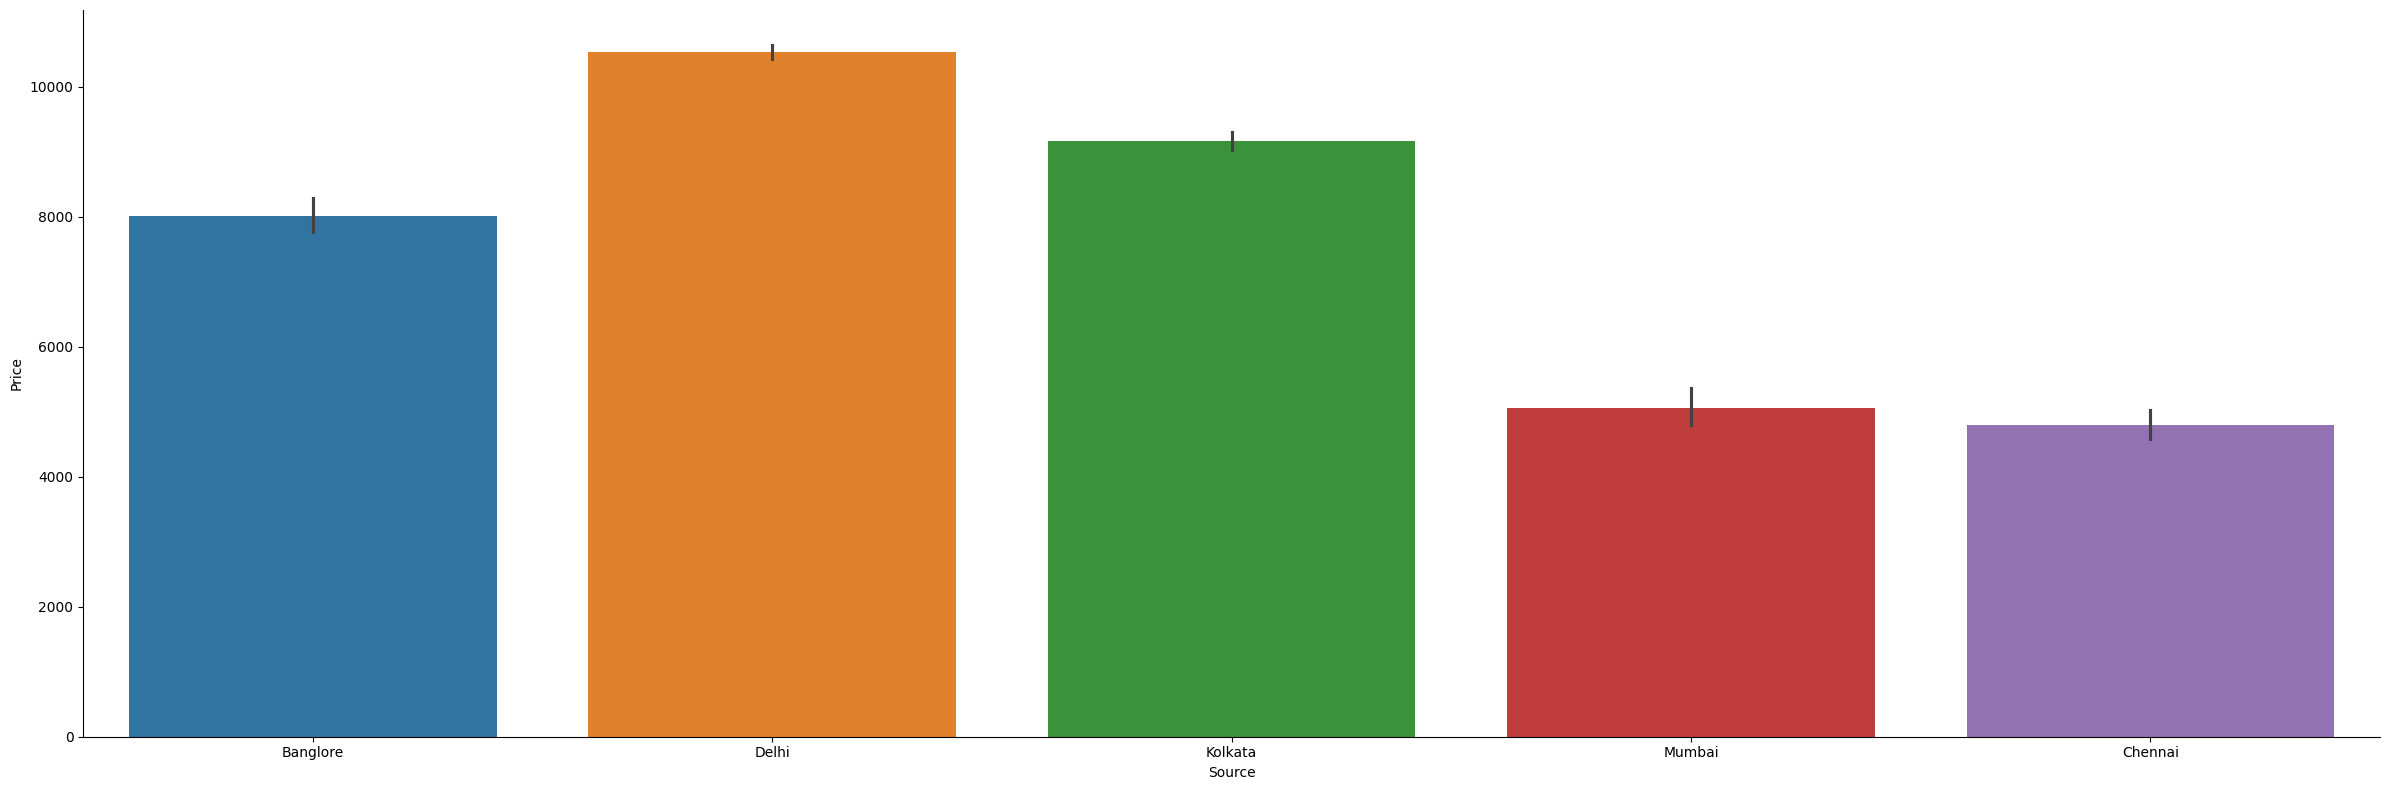

In [24]:
sns.catplot(y = "Price", x = "Source", data = df_flight.sort_values("Price", ascending = False), kind="bar", height = 8, aspect=3, hue="Source")
plt.show()

**Above graph tells us that flights with Delhi as the boarding airport have the highest prices among all the airports.**

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [25]:
df_flight.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


#### Changing the Duration Feature into integer value by converting the entire value into minutes.

In [26]:
df_flight_copy = df_flight.copy()

In [27]:
df_flight_copy['Duration'] = df_flight_copy['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [28]:
df_flight_copy.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019


Airline, Source, Destination, journey_month & Duration are the factors that will impact the filght prices.

#### BOARDING POINT VS PRICE

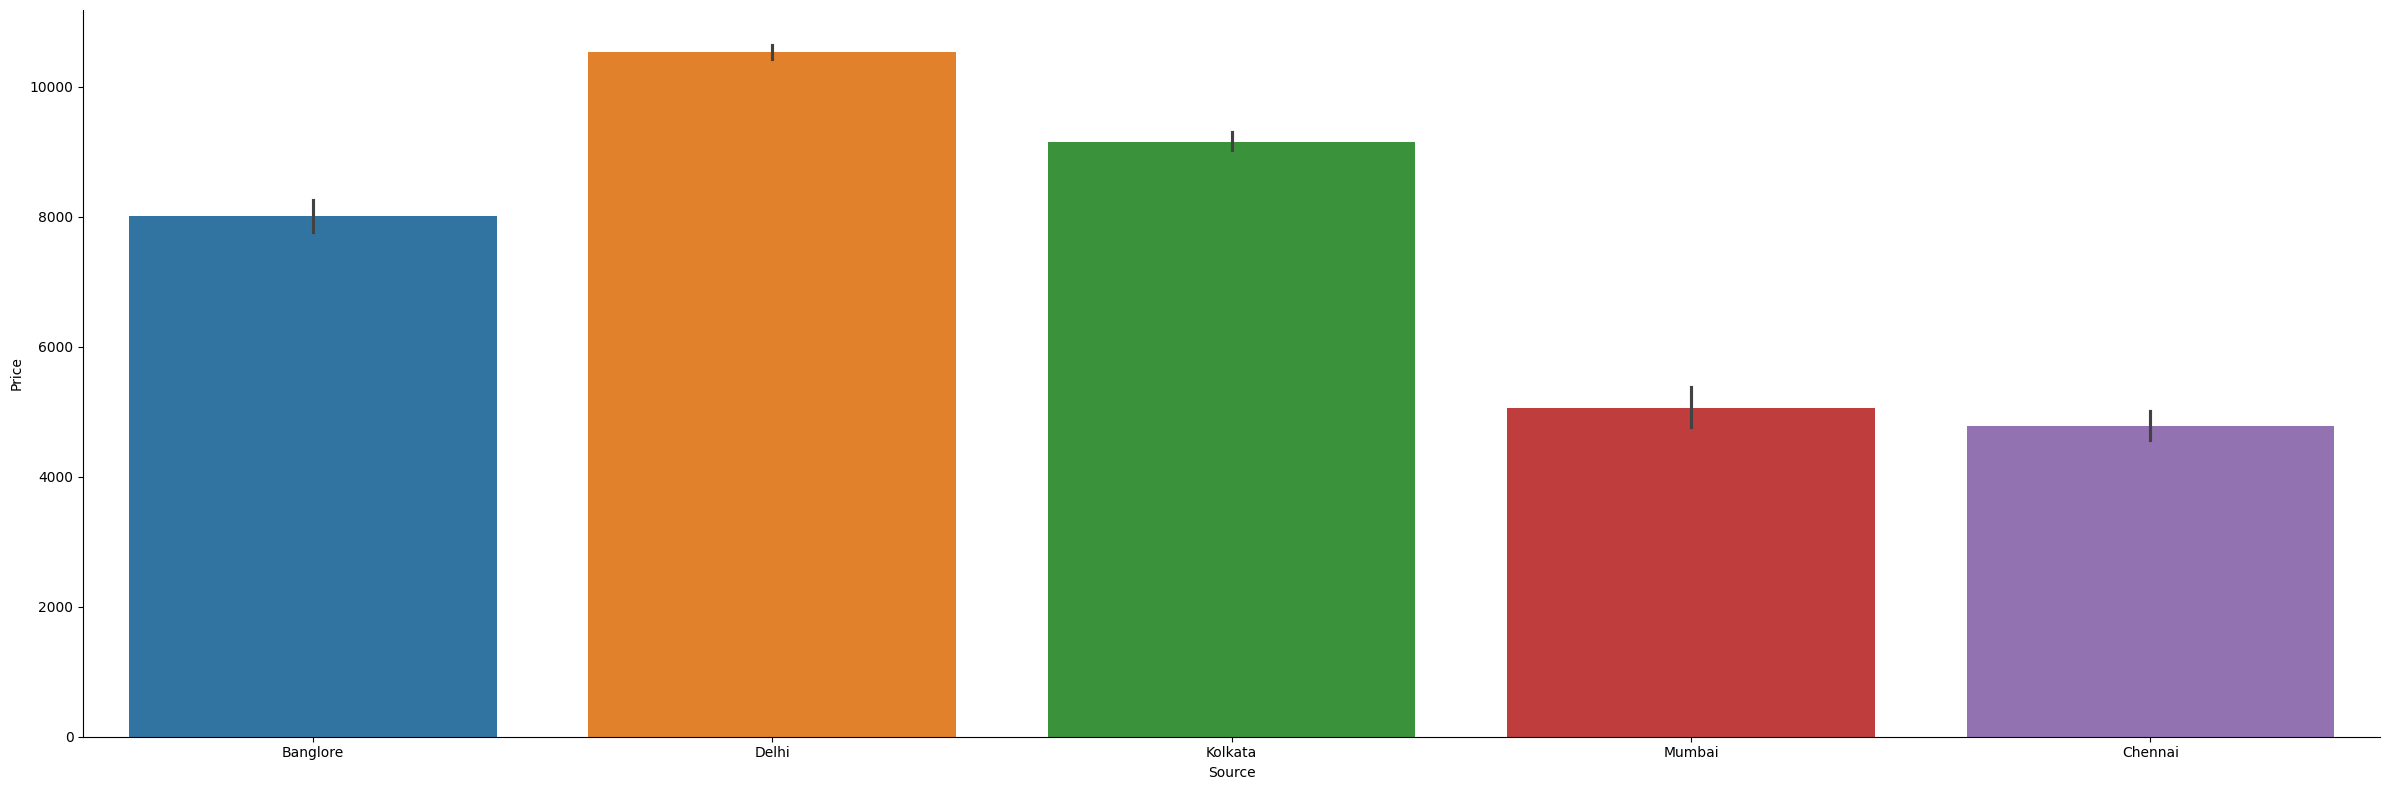

In [29]:
sns.catplot(y = "Price", x = "Source", data = df_flight_copy.sort_values("Price", ascending = False), kind="bar", height = 8, aspect=3, hue="Source")
plt.show()

#### DESTINATION VS PRICE

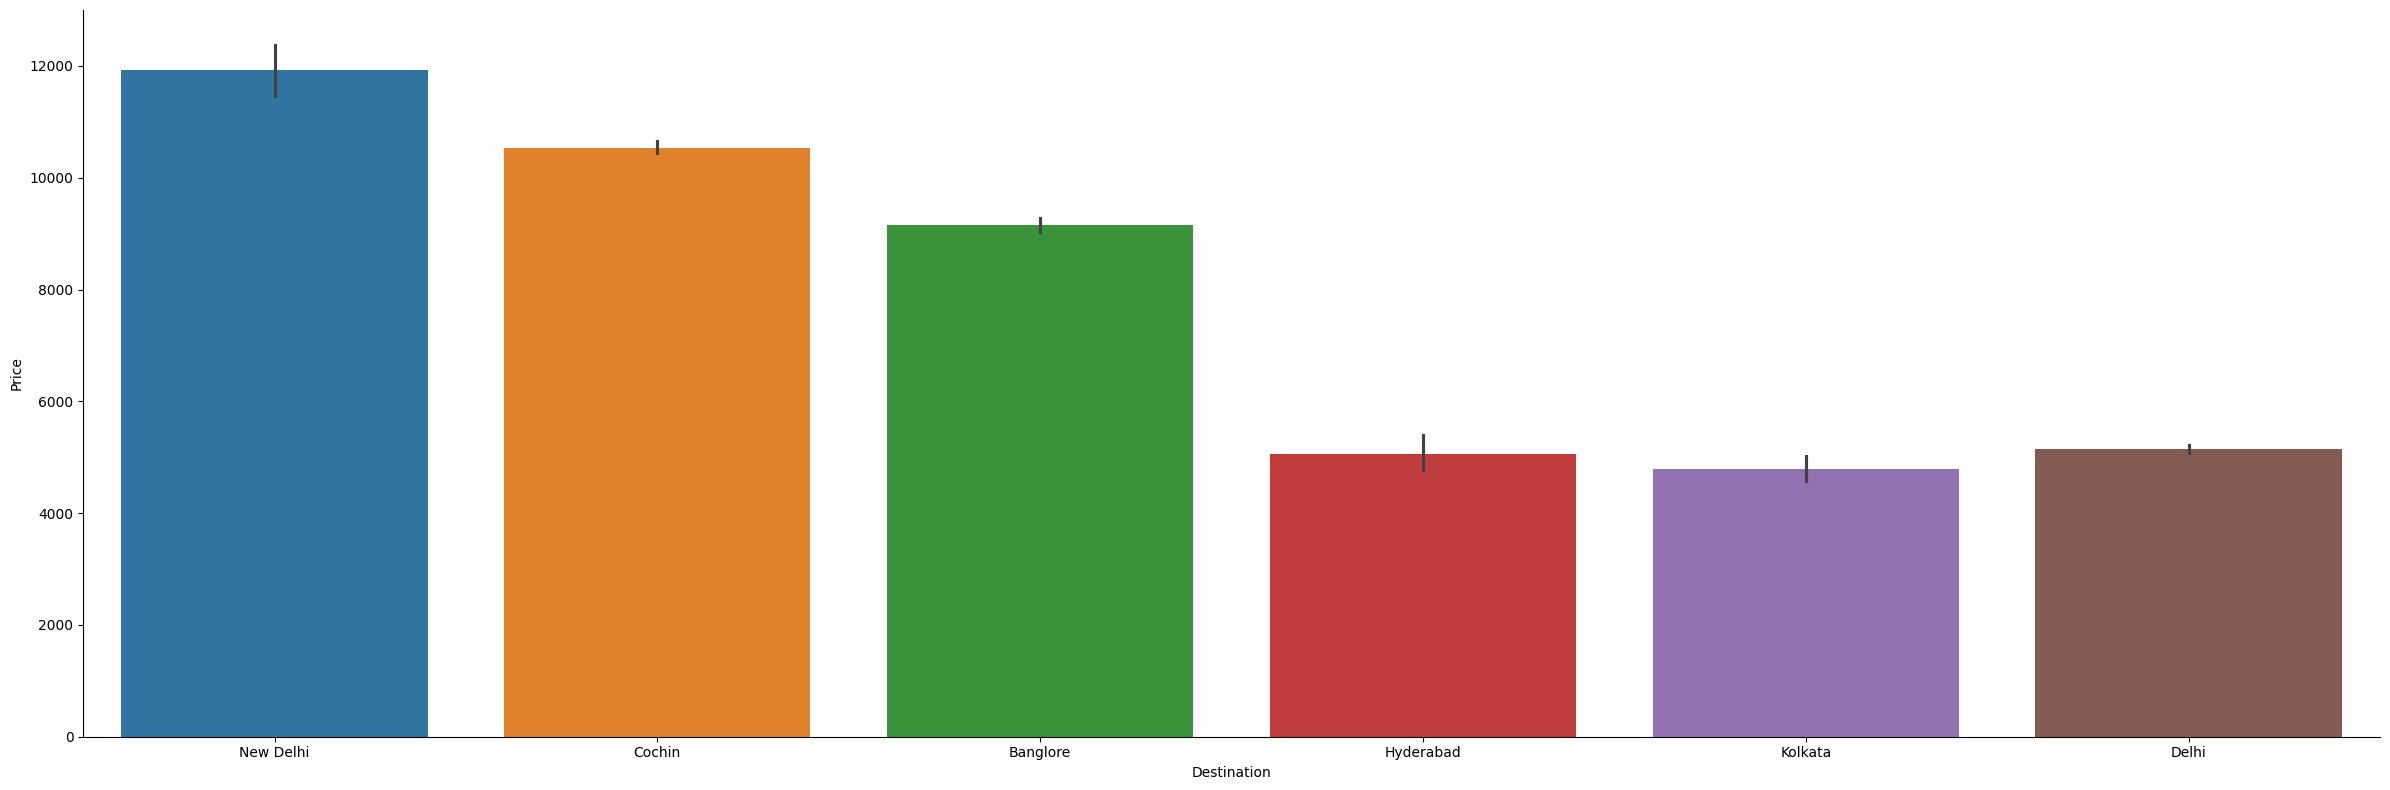

In [30]:
sns.catplot(y = "Price", x = "Destination", data = df_flight_copy.sort_values("Price", ascending = False), kind="bar", height = 8, aspect = 3, hue="Destination")
plt.show()

#### JOURNEY MONTH VS PRICE

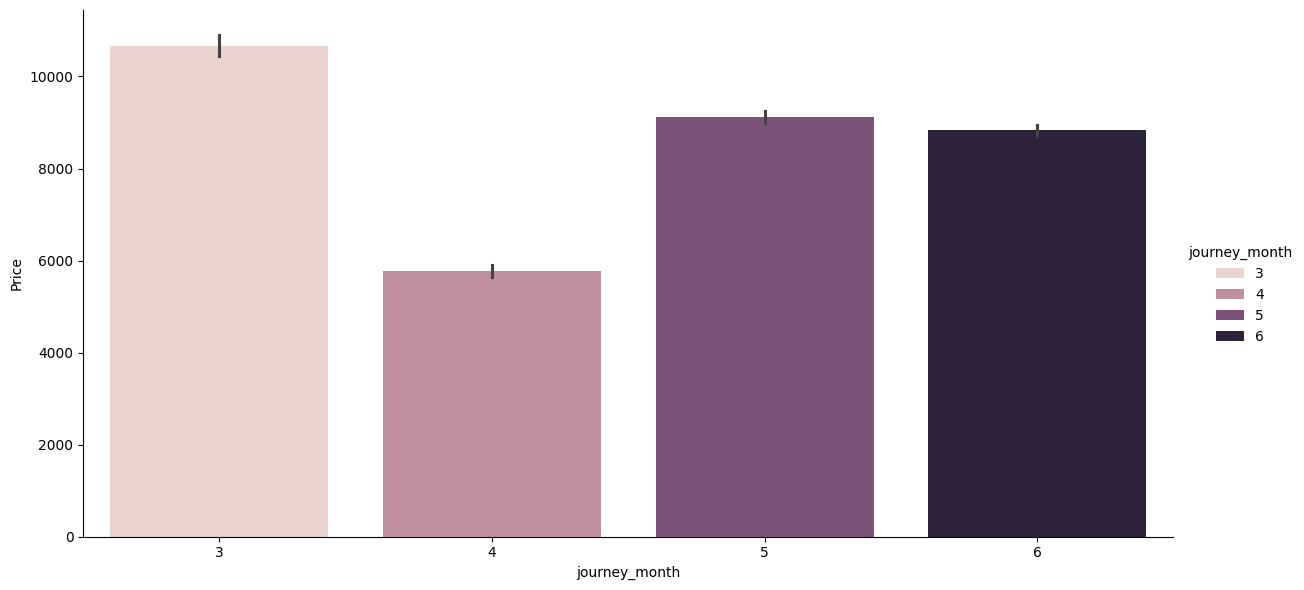

In [31]:
# here number represents the months (e.g Number 1 refers to January Month, Number 3 refers to March Month)

sns.catplot(y = "Price", x = "journey_month", data = df_flight.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 2, hue="journey_month")
plt.show()

#### AIRLINE VS PRICE

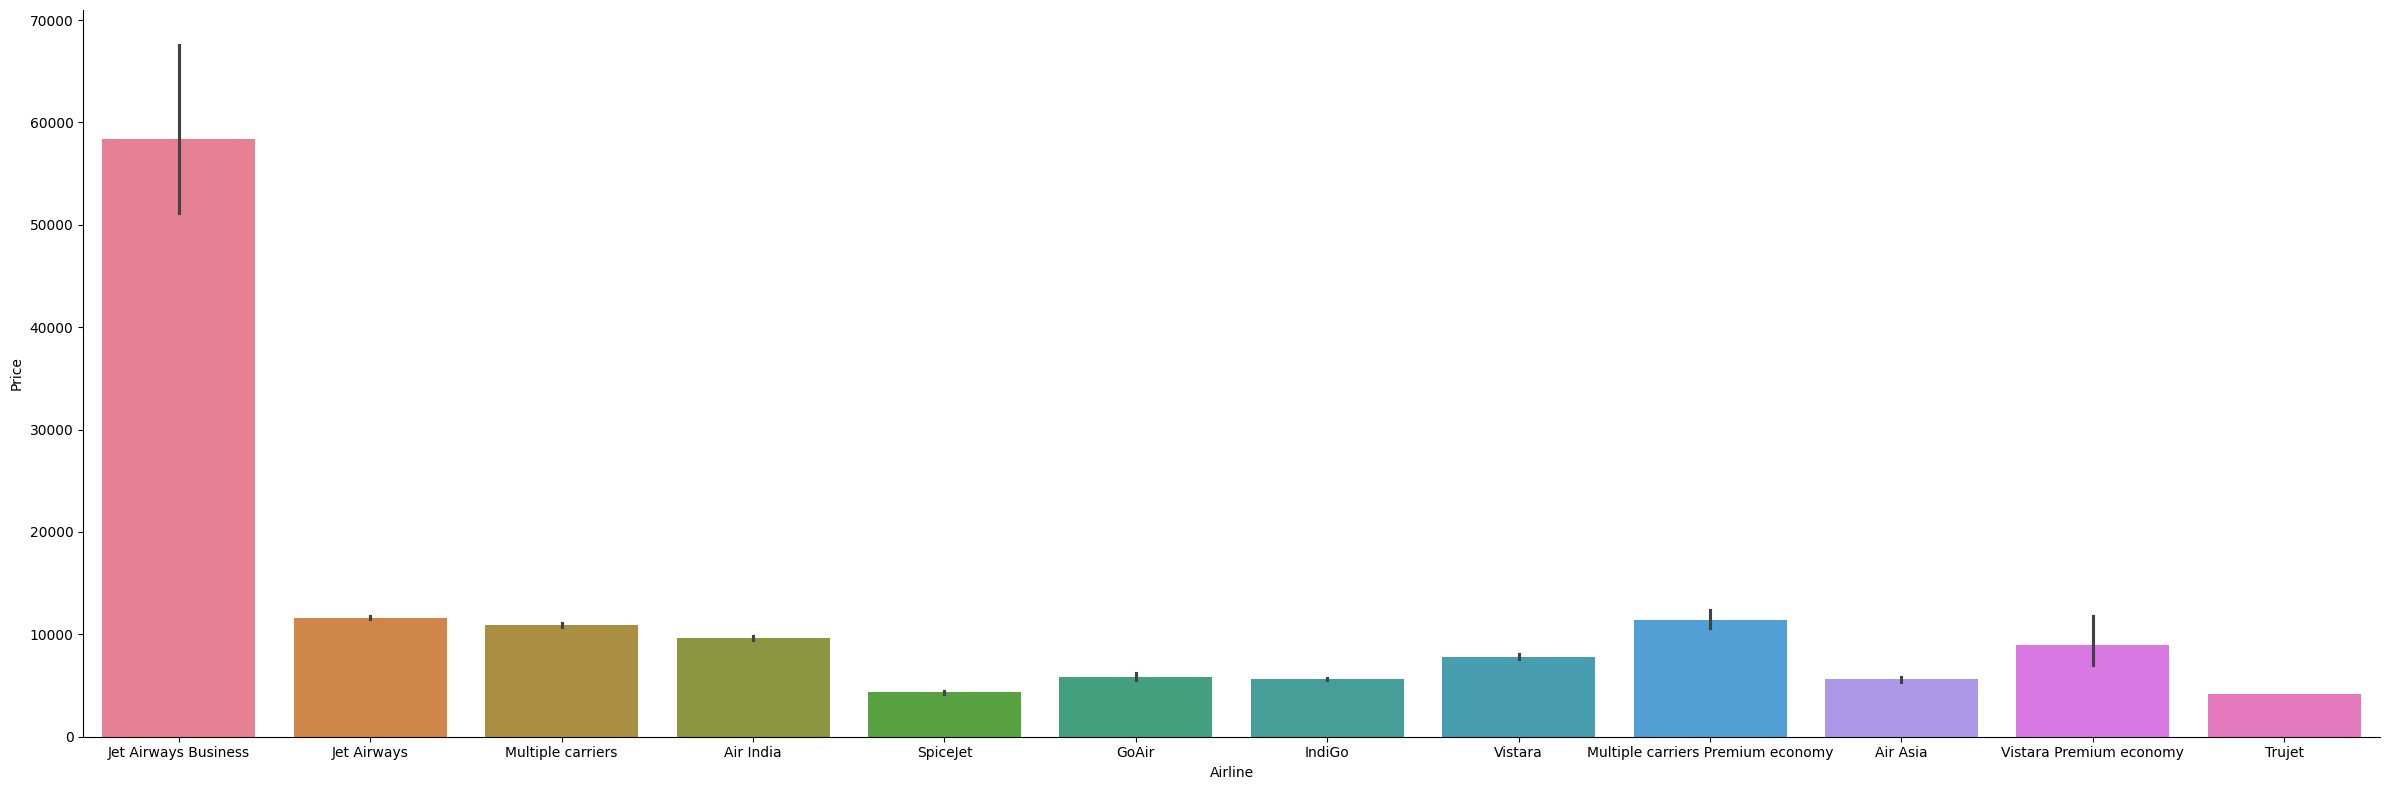

In [32]:
sns.catplot(y = "Price", x = "Airline", data = df_flight.sort_values("Price", ascending = False), kind="bar", height = 8, aspect = 3, hue="Airline")
plt.show()

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?


In [33]:
playstore_dataset = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.


In [34]:
playstore_dataset.shape

(10841, 13)

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [35]:
playstore_dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Conclusion: The "Rating" feature has 1474 missing values.

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [36]:
playstore_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
playstore_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [38]:
playstore_dataset["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [39]:
playstore_dataset['Size']=playstore_dataset['Size'].str.replace('M','000')
playstore_dataset['Size']=playstore_dataset['Size'].str.replace('k','')
playstore_dataset['Size']=playstore_dataset['Size'].str.replace('+','')
playstore_dataset['Size']=playstore_dataset['Size'].str.replace(',','')
playstore_dataset['Size']=playstore_dataset['Size'].replace('Varies with device',np.nan)
playstore_dataset['Size']=playstore_dataset['Size'].astype(float)

In [40]:
playstore_dataset["Size"].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

<Axes: xlabel='Size', ylabel='Rating'>

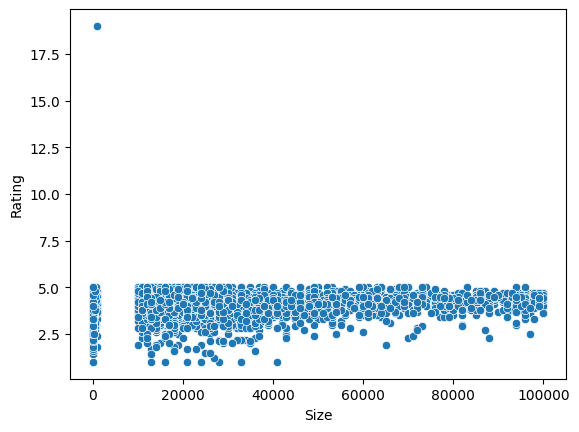

In [41]:
sns.scatterplot(x="Size", y="Rating", data=playstore_dataset)

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


In [42]:
playstore_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
playstore_dataset["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [44]:
playstore_dataset['Price']=playstore_dataset['Price'].str.replace('$','')
playstore_dataset['Price']=playstore_dataset['Price'].replace('Everyone',np.nan)
playstore_dataset['Price']=playstore_dataset['Price'].astype(float)

In [45]:
playstore_dataset["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

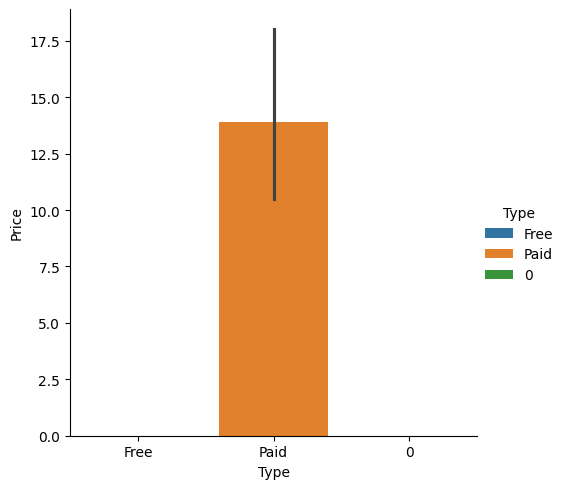

In [46]:
sns.catplot(x="Type",y="Price", data=playstore_dataset, kind='bar', hue="Type")

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [47]:
playstore_dataset["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [48]:
playstore_dataset['Installs']=playstore_dataset['Installs'].str.replace('+', '')
playstore_dataset['Installs']=playstore_dataset['Installs'].str.replace(',', '')
playstore_dataset['Installs']=playstore_dataset['Installs'].str.replace('Free', '0')
playstore_dataset['Installs']=playstore_dataset['Installs'].astype(float)

In [49]:
playstore_dataset["Installs"].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [50]:
playstore_dataset.sort_values("Installs", ascending=False)[:10]["App"]

3565                                Google Drive
3896                              Subway Surfers
381                           WhatsApp Messenger
335     Messenger – Text and Video Chat for Free
3523                                Google Drive
3904                          WhatsApp Messenger
1917                              Subway Surfers
865                            Google Play Games
3687                     Google Play Movies & TV
3765                                 Google News
Name: App, dtype: object

## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [51]:
playstore_dataset["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

<Axes: ylabel='count'>

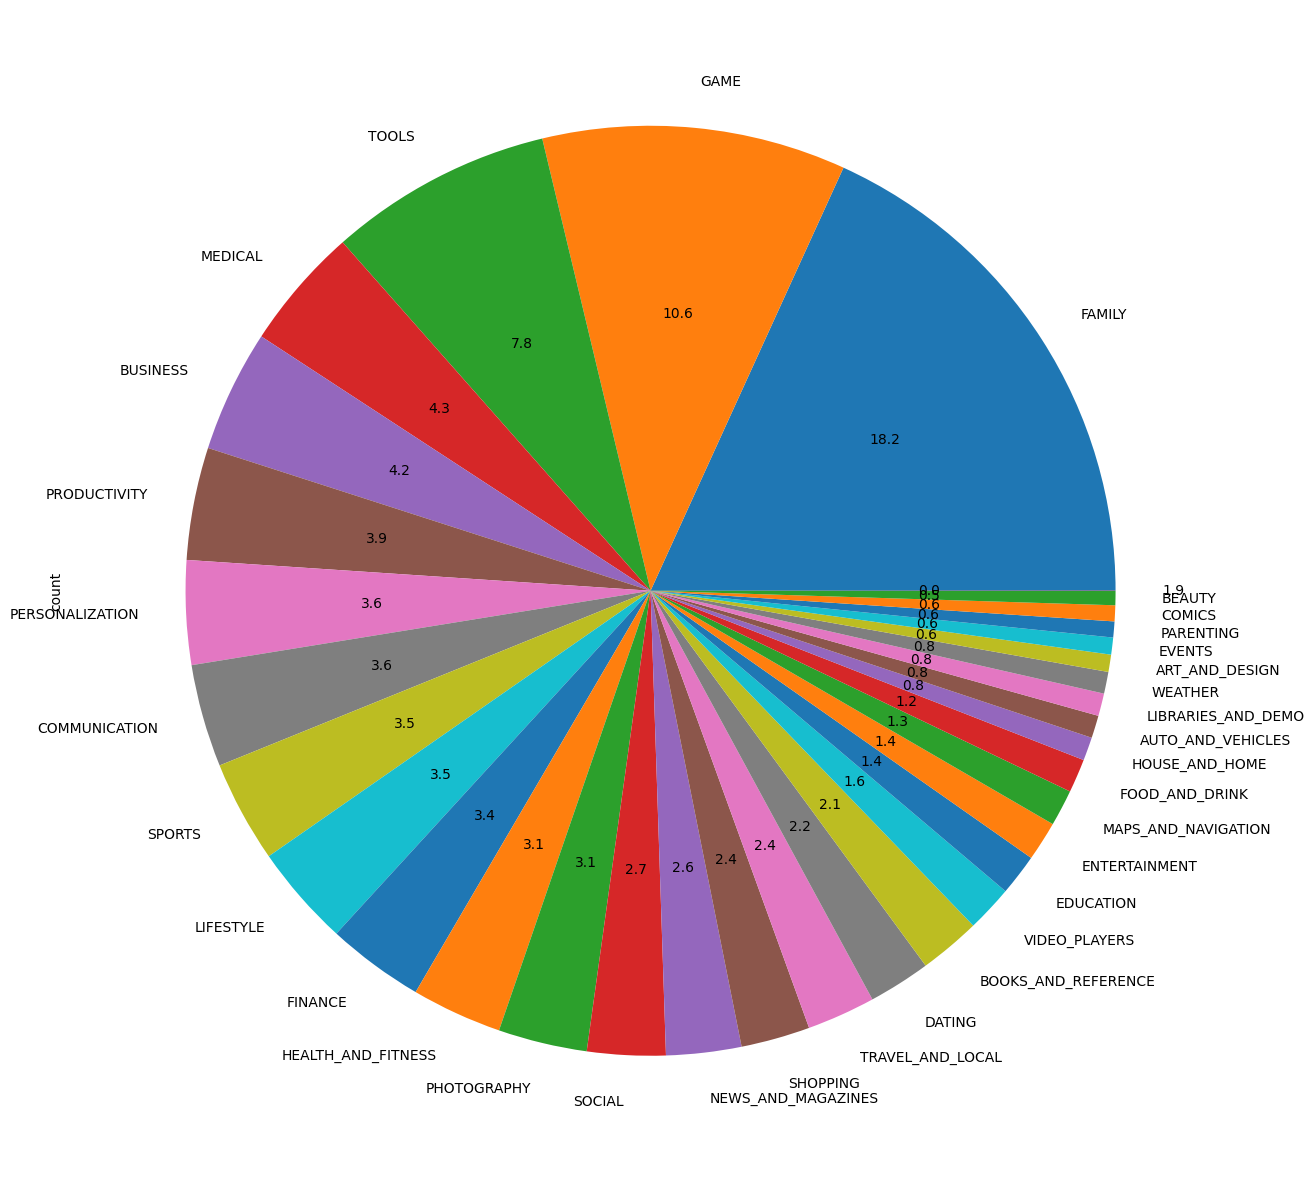

In [52]:
playstore_dataset['Category'].value_counts().plot.pie(y=playstore_dataset['Category'],figsize=(15,16),autopct='%1.1f')

Family, Game & Tools are the most popular app category. So any new application in the playstore should target these categories.

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

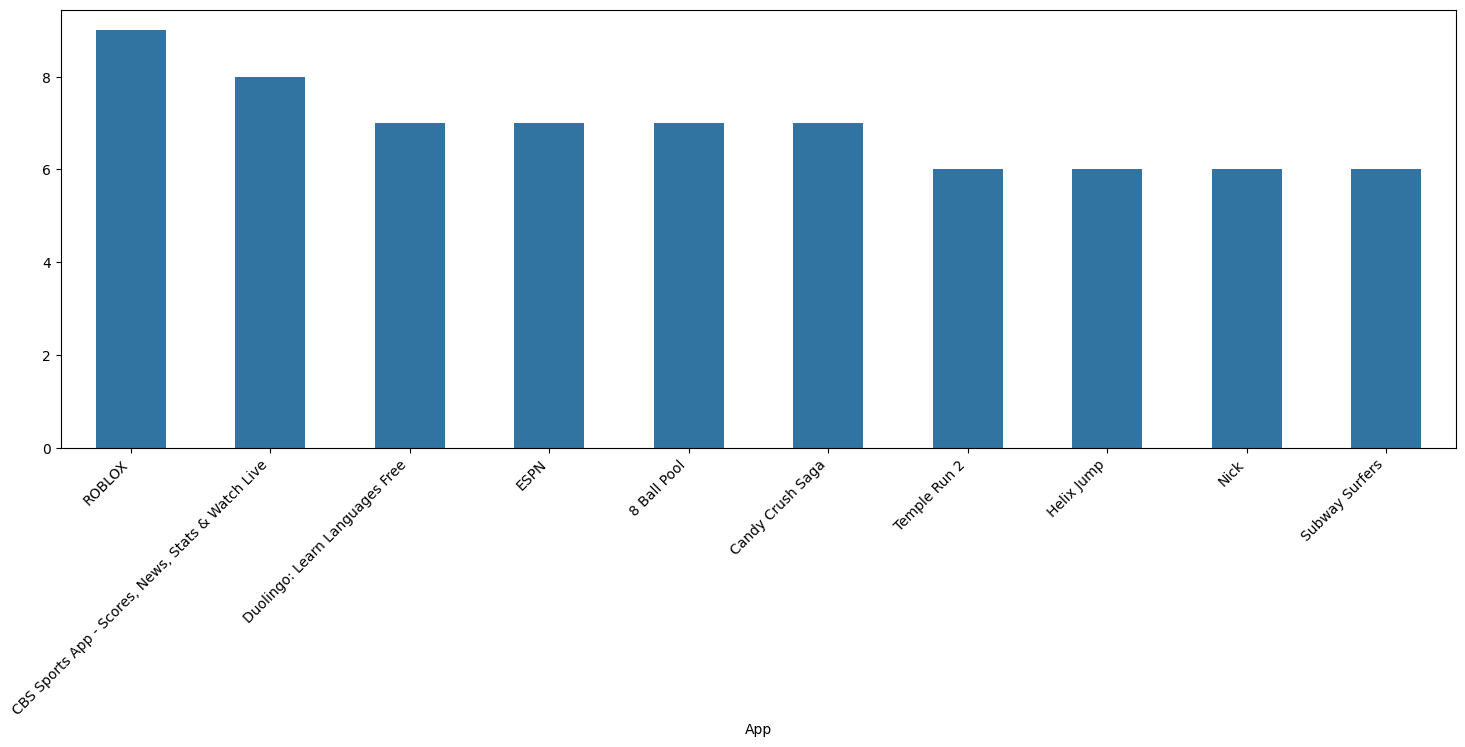

In [77]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=playstore_dataset["App"].value_counts()[:10].index, y=playstore_dataset["App"].value_counts()[:10].values, width=0.5)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

Note: Fix ovrelapping of names in the x-axis: https://stackoverflow.com/questions/57251575/overlapping-names-in-bar-diagram

#### So the recommanded features would the "App" and the most successfull app developers would be "ROBLOX".

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?


### Feature I would analyse is "Last Updated" to identify the best time to launch a new app.

In [89]:
playstore_dataset["Last Updated"].str.split(" ").str[0].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February', '1.0.19'],
      dtype=object)

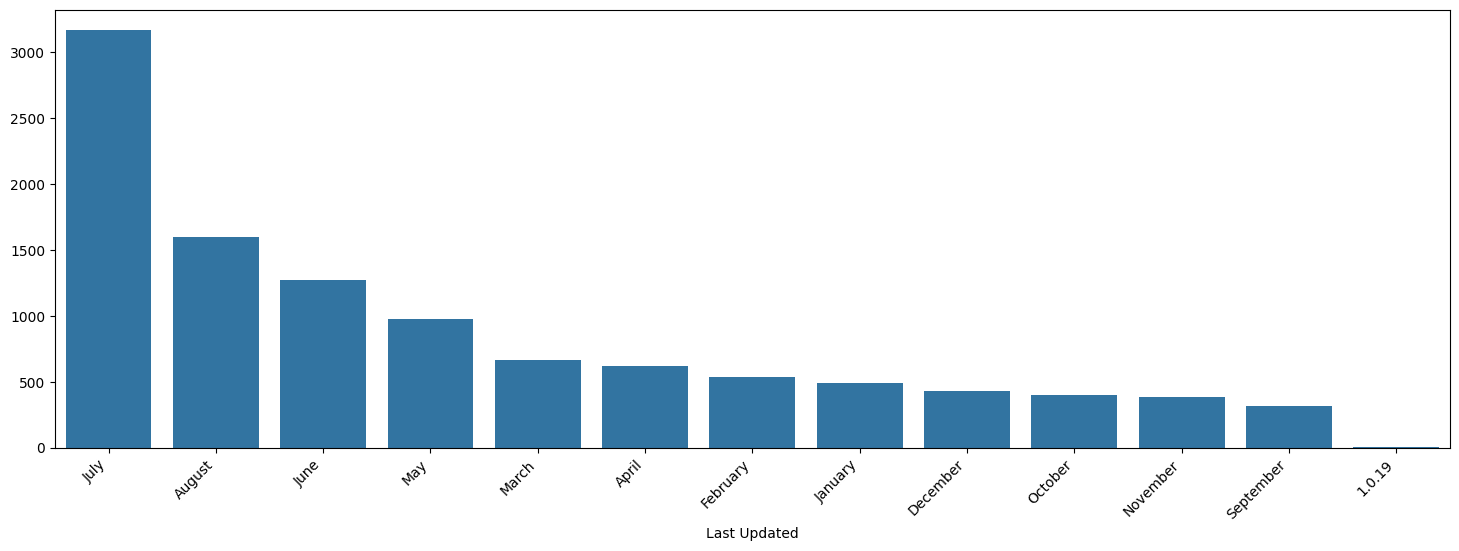

In [88]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=playstore_dataset["Last Updated"].str.split(" ").str[0].value_counts().index, y=playstore_dataset["Last Updated"].str.split(" ").str[0].value_counts().values)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

### July month is the best time to launch a new app in the app store.